In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import torch
from sklearn.preprocessing import MinMaxScaler

In [54]:
df = pd.read_csv("./task_1a_dataset.csv")
df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2012,Bangalore,3,37,Male,No,0,0
1,Masters,2017,New Delhi,2,28,Male,No,4,0
2,Bachelors,2017,New Delhi,2,36,Male,No,3,0
3,Bachelors,2015,Bangalore,3,27,Male,Yes,5,0
4,Bachelors,2017,Bangalore,3,29,Male,No,4,0


In [55]:
df.shape

(4633, 9)

In [49]:
leave_or_not = df['LeaveOrNot']
df.drop('LeaveOrNot',inplace=True,axis='columns')

In [50]:
df.shape

(4633, 8)

In [59]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [52]:
df.sample(1)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
3686,Bachelors,2017,Bangalore,3,35,Male,No,2


In [56]:
df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2012,Bangalore,3,37,Male,No,0,0
1,Masters,2017,New Delhi,2,28,Male,No,4,0
2,Bachelors,2017,New Delhi,2,36,Male,No,3,0
3,Bachelors,2015,Bangalore,3,27,Male,Yes,5,0
4,Bachelors,2017,Bangalore,3,29,Male,No,4,0


In [73]:
exp_no_left = df[df['LeaveOrNot']==0].ExperienceInCurrentDomain
exp_yes_left = df[df['LeaveOrNot']==1].ExperienceInCurrentDomain
exp_yes_left.size,exp_no_left.size


(1592, 3041)

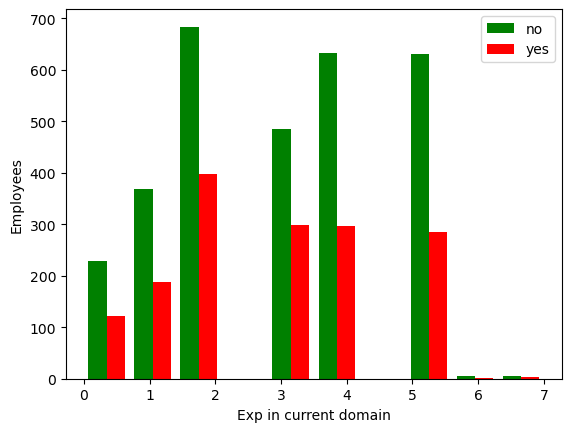

In [82]:
plt.hist([exp_no_left,exp_yes_left],color=['green','red'],label=['no','yes'])
plt.xlabel("Exp in current domain")
plt.ylabel("Employees")
plt.legend()

In [81]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

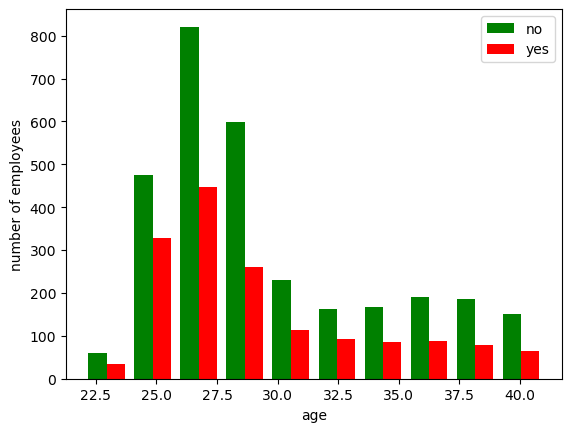

In [96]:
age_no = df[df['LeaveOrNot']==0].Age 
age_yes = df[df['LeaveOrNot']==1].Age 
plt.hist([age_no,age_yes],color=['green','red'],label=['no','yes'])
plt.xlabel("age")
plt.ylabel("number of employees")
plt.legend()

In [98]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [8]:
def plot_char(no_col,yes_col,char):
    plt.hist([no_col,yes_col],color=['green','red'],label=['no','yes'])
    plt.xlabel(char)
    plt.ylabel("Employees")
    plt.legend()

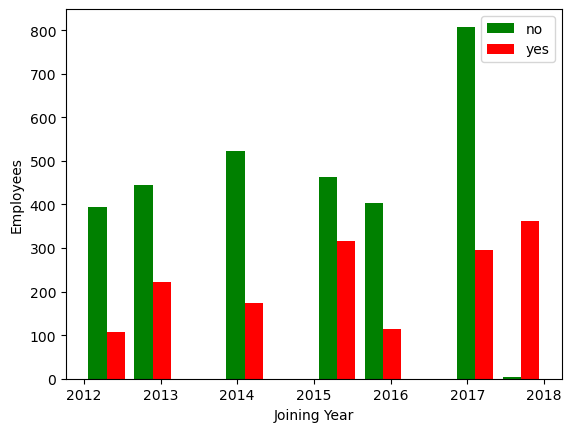

In [127]:
years_no_left = df[df['LeaveOrNot']==0].JoiningYear
years_yes_left = df[df['LeaveOrNot']==1].JoiningYear
plot_char(years_no_left,years_yes_left,"Joining Year")

In [128]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [137]:
df.EverBenched.unique()

array(['No', 'Yes'], dtype=object)

In [150]:
for column in df:
    print("{}: {}".format(column,df[column].unique()))

Education: ['Bachelors' 'Masters' 'PHD']
JoiningYear: [2012 2017 2015 2013 2016 2014 2018]
City: ['Bangalore' 'New Delhi' 'Pune']
PaymentTier: [3 2 1]
Age: [37 28 36 27 29 22 23 31 30 25 26 40 34 39 35 38 32 24 33 41]
Gender: [0 1]
EverBenched: [1 0]
ExperienceInCurrentDomain: [0 4 3 5 2 1 7 6]
LeaveOrNot: [0 1]


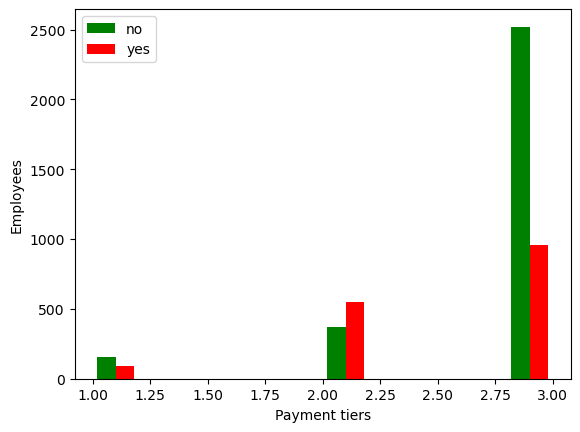

In [143]:
payment_tier_no = df[df['LeaveOrNot']==0].PaymentTier
payment_tier_yes = df[df['LeaveOrNot']==1].PaymentTier
plot_char(payment_tier_no,payment_tier_yes,"Payment tiers")

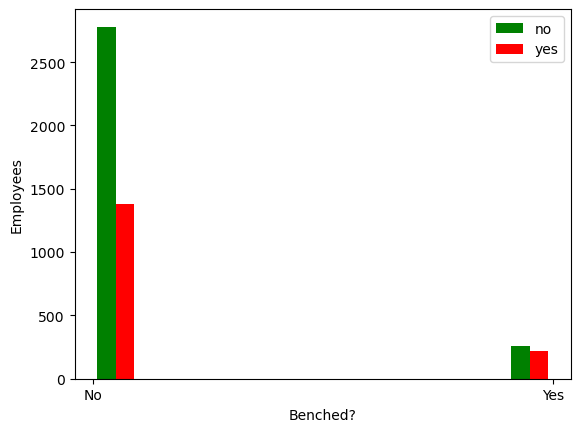

In [144]:
ever_b_no = df[df['LeaveOrNot']==0].EverBenched
ever_b_yes = df[df['LeaveOrNot']==1].EverBenched
plot_char(ever_b_no,ever_b_yes,"Benched?")

In [147]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
df['Gender'].unique()

array([0, 1])

In [149]:
df['EverBenched'].replace({'Yes':0,'No':1},inplace=True)
df['EverBenched']

0       1
1       1
2       1
3       0
4       1
       ..
4628    1
4629    1
4630    1
4631    0
4632    0
Name: EverBenched, Length: 4633, dtype: int64

In [156]:
df1 = pd.get_dummies(columns=['Education','City'],data=df,dtype=int)
df1

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune
0,2012,3,37,0,1,0,0,1,0,0,1,0,0
1,2017,2,28,0,1,4,0,0,1,0,0,1,0
2,2017,2,36,0,1,3,0,1,0,0,0,1,0
3,2015,3,27,0,0,5,0,1,0,0,1,0,0
4,2017,3,29,0,1,4,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4628,2013,3,26,1,1,4,0,1,0,0,1,0,0
4629,2013,2,37,0,1,2,1,0,1,0,0,0,1
4630,2018,3,27,0,1,5,1,0,1,0,0,1,0
4631,2012,3,30,0,0,2,0,1,0,0,1,0,0


In [157]:
df1.dtypes

JoiningYear                  int64
PaymentTier                  int64
Age                          int64
Gender                       int64
EverBenched                  int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
Education_Bachelors          int64
Education_Masters            int64
Education_PHD                int64
City_Bangalore               int64
City_New Delhi               int64
City_Pune                    int64
dtype: object

In [158]:
df1.shape, df.shape

((4633, 13), (4633, 9))

In [163]:
for column in df1:
    print("{}: {}".format(column,df1[column].unique()))

JoiningYear: [2012 2017 2015 2013 2016 2014 2018]
PaymentTier: [3 2 1]
Age: [37 28 36 27 29 22 23 31 30 25 26 40 34 39 35 38 32 24 33 41]
Gender: [0 1]
EverBenched: [1 0]
ExperienceInCurrentDomain: [0 4 3 5 2 1 7 6]
LeaveOrNot: [0 1]
Education_Bachelors: [1 0]
Education_Masters: [0 1]
Education_PHD: [0 1]
City_Bangalore: [1 0]
City_New Delhi: [0 1]
City_Pune: [0 1]


In [8]:
df1.to_csv("Propcessed_data.csv",index=False)

In [2]:
df1 = pd.read_csv("task_1a_dataset.csv")

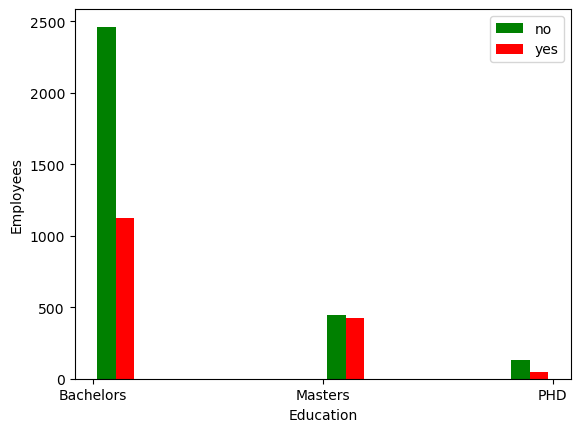

In [9]:
edu_no_left = df1[df1['LeaveOrNot']==0].Education
edu_yes_left = df1[df1['LeaveOrNot']==1].Education
plot_char(edu_no_left,edu_yes_left,"Education")

In [3]:
df1.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2012,Bangalore,3,37,Male,No,0,0
1,Masters,2017,New Delhi,2,28,Male,No,4,0
2,Bachelors,2017,New Delhi,2,36,Male,No,3,0
3,Bachelors,2015,Bangalore,3,27,Male,Yes,5,0
4,Bachelors,2017,Bangalore,3,29,Male,No,4,0


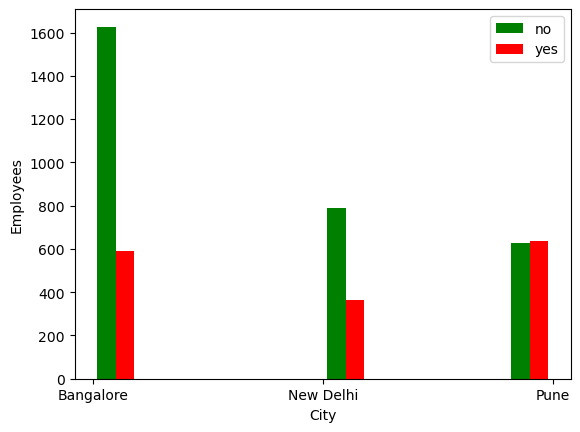

In [11]:
city_no_left = df1[df1['LeaveOrNot']==0].City
city_yes_left = df1[df1['LeaveOrNot']==1].City
plot_char(city_no_left,city_yes_left,"City")

In [12]:
df1.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2012,Bangalore,3,37,Male,No,0,0
1,Masters,2017,New Delhi,2,28,Male,No,4,0
2,Bachelors,2017,New Delhi,2,36,Male,No,3,0
3,Bachelors,2015,Bangalore,3,27,Male,Yes,5,0
4,Bachelors,2017,Bangalore,3,29,Male,No,4,0


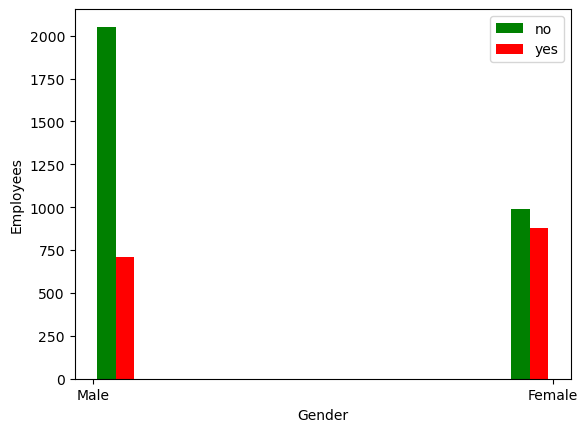

In [13]:
city_no_left = df1[df1['LeaveOrNot']==0].Gender
city_yes_left = df1[df1['LeaveOrNot']==1].Gender
plot_char(city_no_left,city_yes_left,"Gender")

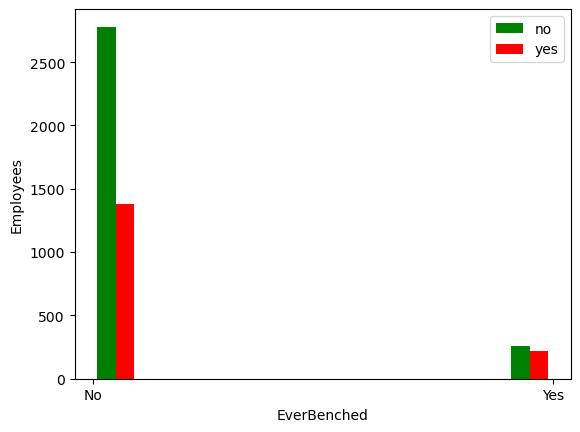

In [14]:
city_no_left = df1[df1['LeaveOrNot']==0].EverBenched
city_yes_left = df1[df1['LeaveOrNot']==1].EverBenched
plot_char(city_no_left,city_yes_left,"EverBenched")

In [2]:
df = pd.read_csv("task_1a_dataset.csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2012,Bangalore,3,37,Male,No,0,0
1,Masters,2017,New Delhi,2,28,Male,No,4,0
2,Bachelors,2017,New Delhi,2,36,Male,No,3,0
3,Bachelors,2015,Bangalore,3,27,Male,Yes,5,0
4,Bachelors,2017,Bangalore,3,29,Male,No,4,0
...,...,...,...,...,...,...,...,...,...
4628,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4629,Masters,2013,Pune,2,37,Male,No,2,1
4630,Masters,2018,New Delhi,3,27,Male,No,5,1
4631,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [10]:
df2['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [5]:
df2['JoiningYear'].unique()

array([2012, 2017, 2015, 2013, 2016, 2014, 2018])

In [15]:
torched = torch.tensor(df2['Age'].values)
torched

tensor([37, 28, 36,  ..., 27, 30, 33])

In [6]:
df2.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2012,Bangalore,3,37,Male,No,0,0
1,Masters,2017,New Delhi,2,28,Male,No,4,0
2,Bachelors,2017,New Delhi,2,36,Male,No,3,0
3,Bachelors,2015,Bangalore,3,27,Male,Yes,5,0
4,Bachelors,2017,Bangalore,3,29,Male,No,4,0


In [8]:
df2['Education'].replace('Bachelors',1,inplace=True)
df2['Education'].head()

0          1
1    Masters
2          1
3          1
4          1
Name: Education, dtype: object

In [11]:
df2['PaymentTier'].dtype

dtype('int64')

In [25]:
df['Education'].replace({"Bachelors":0,"Masters":1,"PHD":2},inplace=True)
df['City'].replace({"Bangalore":0,"New Delhi":1,"Pune":2},inplace=True)
df['Gender'].replace({"Male":0,"Female":1},inplace=True)
df['EverBenched'].replace({"No":0,"Yes":1},inplace=True)
MinMx = MinMaxScaler()
Scaled_columns = ['Age', 'JoiningYear']
df[Scaled_columns] = MinMx.fit_transform(df[Scaled_columns])

In [26]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,0.000000,0,3,0.789474,0,0,0,0
1,1,0.833333,1,2,0.315789,0,0,4,0
2,0,0.833333,1,2,0.736842,0,0,3,0
3,0,0.500000,0,3,0.263158,0,1,5,0
4,0,0.833333,0,3,0.368421,0,0,4,0


In [27]:
for column in df:
    print(f"{column}: {df[column].unique()}")

Education: [0 1 2]
JoiningYear: [0.         0.83333333 0.5        0.16666667 0.66666667 0.33333333
 1.        ]
City: [0 1 2]
PaymentTier: [3 2 1]
Age: [0.78947368 0.31578947 0.73684211 0.26315789 0.36842105 0.
 0.05263158 0.47368421 0.42105263 0.15789474 0.21052632 0.94736842
 0.63157895 0.89473684 0.68421053 0.84210526 0.52631579 0.10526316
 0.57894737 1.        ]
Gender: [0 1]
EverBenched: [0 1]
ExperienceInCurrentDomain: [0 4 3 5 2 1 7 6]
LeaveOrNot: [0 1]


In [11]:
torched = torch.tensor(df['Age'])
counts,values = torched.unique(return_counts=True)
counts, values

(tensor([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
         40, 41]),
 tensor([ 47,  47, 384, 418, 645, 623, 629, 229, 219, 125, 131, 124, 131, 123,
         139, 139, 134, 130, 134,  82]))